In [21]:
import numpy as np
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt

In [22]:
IMAGE_SIZE = [224, 224]

In [23]:
train_directory='../input/100-bird-species/train'
test_directory='../input/100-bird-species/test'
val_directory='../input/100-bird-species/valid'

In [24]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [25]:
# useful for getting number of classes
folders = glob('../input/100-bird-species/train/*')
len(folders)

525

In [26]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [27]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [28]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [29]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [30]:
print(len(training_set))
print(len(test_set))

2645
83


In [31]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/tmp/ipykernel_34/675562961.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
   1/2645 [..............................] - ETA: 9:37:16 - loss: 6.4165 - accuracy: 0.0000e+00

I0000 00:00:1707828045.113842     106 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2645/2645 [==============================] - 1540s 577ms/step - loss: 6.5084 - accuracy: 0.3177 - val_loss: 3.7563 - val_accuracy: 0.5699
Epoch 2/5
2645/2645 [==============================] - 1238s 468ms/step - loss: 3.4750 - accuracy: 0.6308 - val_loss: 3.0970 - val_accuracy: 0.6830
Epoch 4/5
2645/2645 [==============================] - 1169s 442ms/step - loss: 2.9999 - accuracy: 0.6873 - val_loss: 3.8875 - val_accuracy: 0.6705
Epoch 5/5
2645/2645 [==============================] - 1163s 440ms/step - loss: 2.6380 - accuracy: 0.7269 - val_loss: 3.5434 - val_accuracy: 0.7029


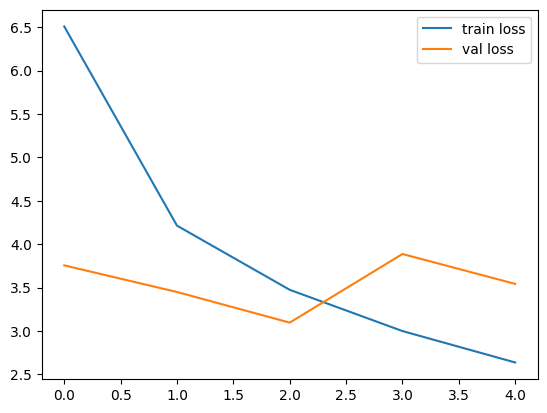

In [32]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

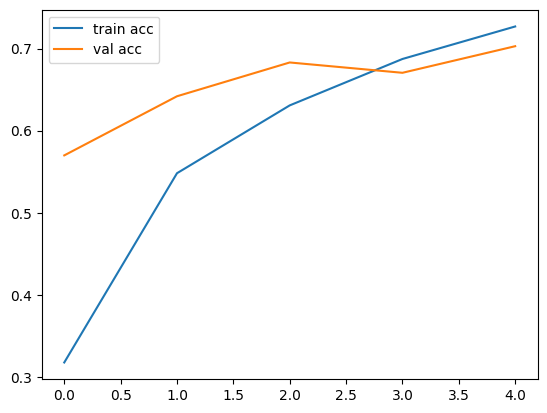

In [33]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [34]:
model.save('BC.h5')

In [35]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

model1 = load_model('./BC.h5',compile=False)  

In [36]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [37]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

1/1 [==============================] - 0s 175ms/step


'BARN OWL'

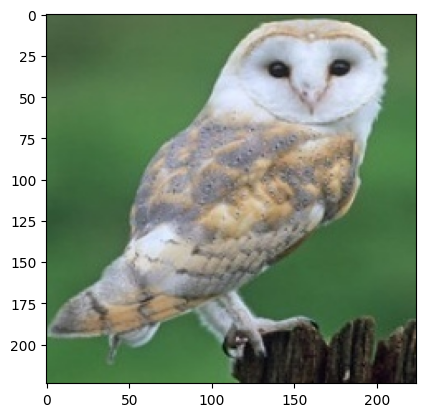

In [38]:
img='../input/100-bird-species/valid/BARN OWL/1.jpg'
pic=load_img('../input/100-bird-species/valid/BARN OWL/1.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

In [39]:
import tensorflow as tf
import keras as k
print(tf.__version__)
print(k.__version__)

2.15.0
2.15.0
